# A simple client to test the model when served by some API

If you you built a model, exported and deployed it locally using the tensorflow serving this notebook is usefull to test predictions

In [41]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import json
import requests

# 172.17.0.1 is the docker host on my machine, you can get it on your machine
# by running "docker network inspect bridge -f '{{range .IPAM.Config}}{{.Gateway}}{{end}}'"
tensorflow_serving_url = "http://172.17.0.1:8501/v1/models/snapmath:predict"

def image_2_model_input(given_image):
    image = cv2.cvtColor(given_image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (28, 28))
    image = cv2.bitwise_not(image)
    image = image / 255
    image = image.reshape(1, 28, 28, 1)
    return image

def get_most_probable_number(predictions):
    probabilities = predictions["predictions"][0]
    most_probable_index = np.argmax(probabilities)
    most_probable_number = most_probable_index
    probability = probabilities[most_probable_index]
    return most_probable_number, probability

def make_prediction(image):
    instances = image.tolist()
    payload = json.dumps({"instances": instances})
    try:
        response = requests.post(tensorflow_serving_url, data=payload, headers={"Content-Type": "application/json"})
        response.raise_for_status()
        predictions = response.json()
        return predictions
    except requests.RequestException as e:
        print(f"Error making prediction request: {e}")
        return None

Loaded image shape (360, 338, 3)
{'predictions': [[0.012135027, 0.00910584908, 0.0141458884, 0.00329310214, 0.855836511, 0.0243009385, 0.0213724356, 0.000658661302, 0.00172959163, 0.0574220754]]}
(4, 0.855836511)


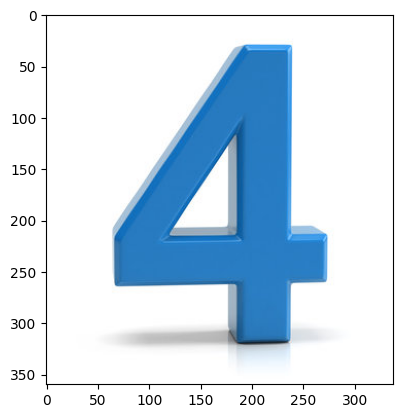

In [57]:
#image_path = 'numbers/1.jpeg'
#image_path = "numbers/8-2.jpg"
#image_path = "numbers/1-a.png"
#image_path = "numbers/2-1.png"
#image_path = "numbers/3-1.png"
image_path = "numbers/4-1.jpg"

img = cv2.imread(image_path)
print(f'Loaded image shape {img.shape}')

# By default OpenCV opens images in BGR, thus, to show it with proper colors with convert it to RGB
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

prepared_image = image_2_model_input(img)
predictions = make_prediction(prepared_image)
print(predictions)
print(get_most_probable_number(predictions))